<a href="https://colab.research.google.com/github/sofipop/Simulaci-n_I/blob/main/tablero_de_colores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tablero de Colores

**OBJETIVO 1:** Simular el movimiento sobre un tablero circular de 4 sectores/colores:
- Al lanzar dos monedas, se avanza en sentido horario:
    - 0 caras: avanzar 0 sectores
    - 1 cara: avanzar 1 sector
    - 2 caras: avanzar 2 sectores


**OBJETIVO 2:**  Responder:
- ¿Son todos los sectores igual de probables cuando pasa mucho tiempo?

## 1. Variables.

- S = 0, 1, 2, 3 (representando los sectores)
- Número de caras en dos monedas: {0 ,1 ,2}

In [ ]:
estados = [0, 1, 2, 3]
estado_actual = 0
visitas = [0, 0, 0, 0]

##2. Distribución de probabilidad

P(0 caras)= 1/4
P(1 cara)= 1/2
P(2 caras)= 1/4

In [16]:
valores_caras = [0, 1, 2]
probabilidades = [0.25, 0.5, 0.25]

##3. Modelar las variables aleatorias


simulamos un paso

In [17]:
import numpy as np

In [21]:
# Simular una tirada
caras = np.random.choice(valores_caras, p=probabilidades)
print(f"Número de caras obtenidas: {caras}")

Número de caras obtenidas: 0


##4. Modelo del sistema y objetivo

- Cada paso: avanzar n sectores/colores(4), según el número de caras.
- Se intenta estimar la probabilidad límite de estar en cada sector

In [22]:
def avanzar(estado_actual, caras):
    return (estado_actual + caras) % 4

##5. Diseñar el experimento

Se simulan muchos pasos (100,000)

In [23]:
n = 100000  # número de pasos

##6. Repetir el experimento m veces

In [24]:
for _ in range(n):
    visitas[estado_actual] += 1
    caras = np.random.choice(valores_caras, p=probabilidades)
    estado_actual = avanzar(estado_actual, caras)

In [25]:
visitas = np.array(visitas)
probs_estimadas = visitas / n
print("Probabilidades estimadas por sector:", probs_estimadas)

Probabilidades estimadas por sector: [0.5009  0.50031 0.49803 0.50076]


##7. Histograma

In [26]:
## Paso 7: Obtener el histograma
import matplotlib.pyplot as plt

In [43]:
colores = ['red', 'green', 'skyblue', 'orange']
nombres_sectores = ['Sector 0', 'Sector 1', 'Sector 2', 'Sector 3']

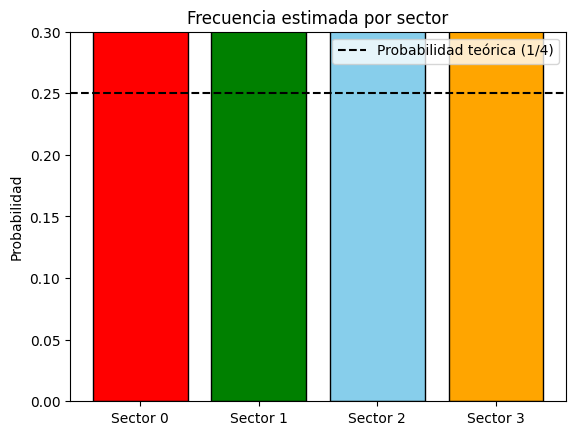

In [44]:
plt.bar(nombres_sectores, probs_estimadas, color=colores, edgecolor='black')
plt.title('Frecuencia estimada por sector')
plt.ylabel('Probabilidad')
plt.ylim(0, 0.3)
plt.axhline(0.25, color='black', linestyle='--', label='Probabilidad teórica (1/4)')
plt.legend()
plt.show()

##SOLUCION ANALITICA

In [36]:
P=np.array([[0.25,0.5,0.25,0],[0,0.25,0.5,0.25],[0.25,0,0.25,0.5],[0.5,0.25,0,0.25]])

In [37]:
A=P.T-np.eye(4)
A=np.vstack((A,np.ones(4)))
b=np.array([0,0,0,0,1])
pi=np.linalg.lstsq(A,b,rcond=None)[0]

##Comparación gráfica

In [38]:
x=np.arange(4)
width=0.35
nombres=['Sector 0',' Sector 1',' Sector 2',' Sector 3']

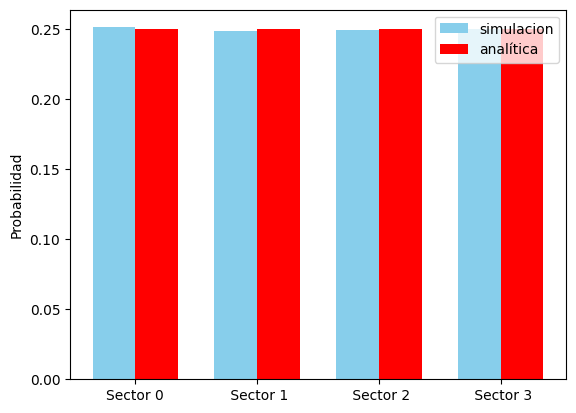

In [46]:
plt.bar(x-width/2,probs_simuladas,width,label='simulacion',color='skyblue')
plt.bar(x+width/2,pi,width,label='analítica', color='red')
plt.xticks(x,nombres)
plt.ylabel('Probabilidad')
plt.legend()
plt.show()

##Conclusión


**¿Son todos los sectores igual de probables cuando pasa mucho tiempo?**
**R=** SÍ. Todos los sectores (0,1,2,3) son igualmente probables a largo plazo


¿Por qué? despues de muchos turnos el jugador tiene la misma probabilidad (25%) de estar en cualquiera de los 4 sectores. Esto es por la estructura del movimiento y a que el tablero es simétrico y es cerrado.
En la simulación esto se confirma cuanso los 100000 pasos dan muy cerca de 0.25 cada uno.